# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

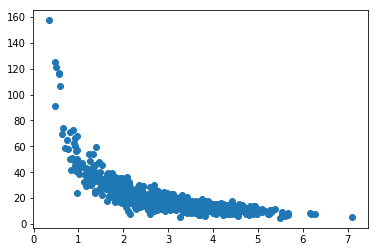

In [13]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [24]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 3))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

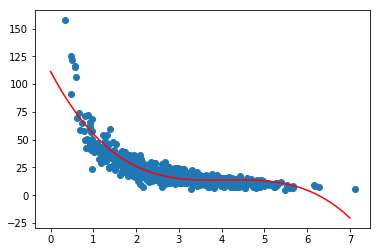

In [25]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.82937663963


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

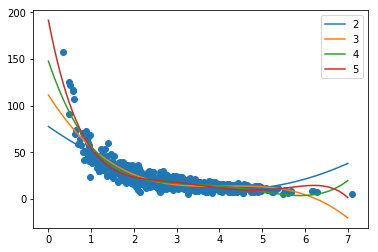

In [46]:
from sklearn.metrics import r2_score
n=[]
r2=[]
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
for i in range(2,6):
    p4 = np.poly1d(np.polyfit(x, y, i))
    rsq = r2_score(y, p4(x))
    r2.append(rsq)
    n.append(i)
    plt.plot(xp, p4(xp))
plt.legend(n)
    

In [35]:
r2

[0.8293766396303073,
 0.8553884386186101,
 0.8700733999871759,
 0.8778369781712103,
 0.8814395663681508,
 0.883026325661585]

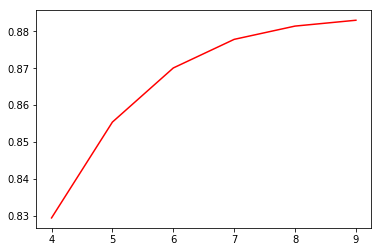

In [36]:
plt.plot(n, r2, c='r')